# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble
%matplotlib inline

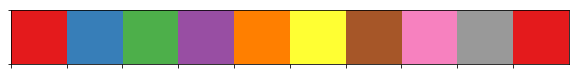

In [2]:
#qualitative color scheme
color_scheme = sns.color_palette("Set1", 10)
sns.set_palette(color_scheme)
sns.palplot(color_scheme)

In [3]:
#import data
data = pd.read_csv("contraceptive_for_students.csv")
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


# Data Cleaning

In [4]:
#Check if the data contains all integer values and thus no Nan or Null Values
for i in data.columns:
    unique_vals = data[i].value_counts()
    print(i + " column all int values: " + str(all(isinstance(x, int) for x in unique_vals)))

wife_age column all int values: True
wife_education column all int values: True
husband_education column all int values: True
num_child column all int values: True
wife_religion column all int values: True
wife_work column all int values: True
husband_occupation column all int values: True
standard_living column all int values: True
media_exposure column all int values: True
contraceptive column all int values: True


In [5]:
#Check for default values or lack of information values
for i in data.columns:
    value_counts = data[i].value_counts()
    #print(i + " Value Counts")
    #print(value_counts.head())
    #print(" ")

Observations: From a very initial observation of this data, no default values stand out. The researchers also recorded that there are no missing values in this data set. There appears to be a high number of husbands who have a very high education (education level of 4), but a little research reveals this is not unexpected as indonesia has a male literacy rate of 97.17%. Another seemingly high count values is wife_work, where there appears to be a majority of women who are not working (wife-work = 1). This checks out with general research that indicates that about 20% of the female population is in the workforce in indonesia. Another particularly relevant observation is that most of individuals surveyed appear to be following islam. This is also consistent with research that suggests that Islam is the majority religion in Indonesia.

# Exploratory Data Analysis

Identify the different data types of each column of the dataset:
<br>
Wife's Age--> Quantitative Discrete
<br>
Wife's Eduation--> Qualitative Ordinal (Categorical)
<br>
Husband's Education --> Qualitiative Ordinal (Categorical)
<br>
Number of Children Born --> Quantitate Discrete
<br>
Wife's Religion--> Qualitative Nominal (Categorical- Binary)
<br>
Wife's Working --> Qualitative Nominal (Categorical- Binary)
<br>
Standard of living --> Qualitative Ordinal (Categorical)
<br>
Media Exposure --> Qualitative Nominal (Categorical- Binary)
<br>
Contraceptive Method --> Qualitative Nominal (Categorical)

##### Distribution of Wife Education

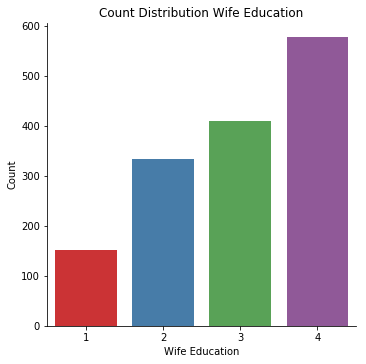

In [6]:
#Distribution of wife education in the data set
sns.catplot(data = data, x = 'wife_education',
            kind = 'count')
plt.xlabel('Wife Education')
plt.ylabel('Count')
plt.title('Count Distribution Wife Education')
plt.savefig('figs/edu_dist.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Correlation of Features

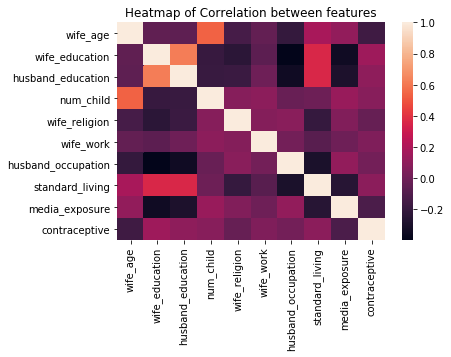

In [7]:
#Heatmap showing correlation  
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("Heatmap of Correlation between features")
plt.savefig('figs/corr_heatmap.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Husband Education

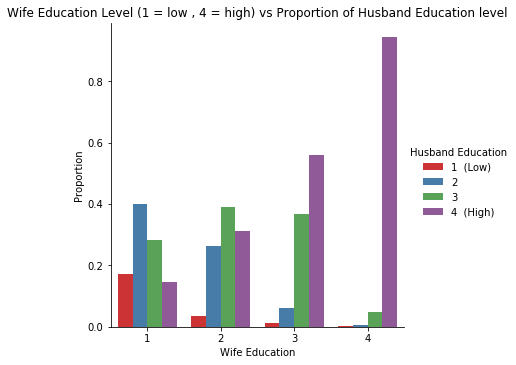

In [8]:
#Proportion Count Plot
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

edu_1 = np.array([(data[(data['wife_education'] == i) & (data['husband_education'] == 1) ].shape[0]) for i in range(1,5)])
edu_2 = np.array([(data[(data['wife_education'] == i) & (data['husband_education'] == 2) ].shape[0]) for i in range(1,5)])
edu_3 = np.array([(data[(data['wife_education'] == i) & (data['husband_education'] == 3) ].shape[0]) for i in range(1,5)])
edu_4 = np.array([(data[(data['wife_education'] == i) & (data['husband_education'] == 4) ].shape[0]) for i in range(1,5)])

d = {'Wife Education' : [1, 2, 3, 4],
     '1  (Low)': edu_1 / wife_sum,
     '2': edu_2 / wife_sum,
     '3': edu_3 / wife_sum,
     '4  (High)': edu_4 / wife_sum }

edu_con = pd.DataFrame(data = d)
edu_con_melt = edu_con.melt(id_vars = ('Wife Education'), 
                                      value_vars = list(d.keys()).remove('Wife Education'), 
                                                          value_name = 'Proportion', 
                                                          var_name = 'Husband Education')
sns.catplot(data = edu_con_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = 'Husband Education')
plt.title('Wife Education Level (1 = low , 4 = high) vs Proportion of Husband Education level')
plt.savefig('figs/edu_edu_bar.png', quality = 100, dpi = 400, bbox_inches="tight")

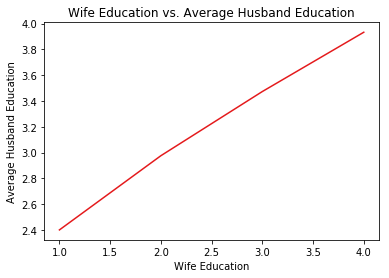

In [9]:
# Line Plot
husband_ed = data.groupby(["wife_education"]).mean()["husband_education"]

plt.plot(husband_ed.index, husband_ed)
plt.xlabel("Wife Education")
plt.ylabel("Average Husband Education")
plt.title('Wife Education vs. Average Husband Education')
plt.savefig('figs/edu_edu_line.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Contraceptive

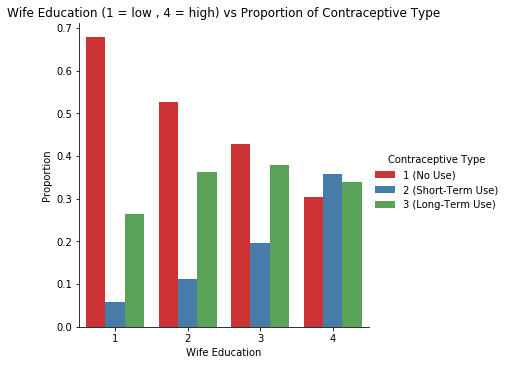

In [10]:
#Proportion Count Plot (Trinary Data)
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

con_sum_0 = np.array([(data[(data['wife_education'] == i) & (data['contraceptive'] == 1) ].shape[0]) for i in range(1,5)])
con_sum_1 = np.array([(data[(data['wife_education'] == i) & (data['contraceptive'] == 2) ].shape[0]) for i in range(1,5)])
con_sum_2 = np.array([(data[(data['wife_education'] == i) & (data['contraceptive'] == 3) ].shape[0]) for i in range(1,5)])

d = {'Wife Education' : [1, 2, 3, 4],
     '1 (No Use)': con_sum_0 / wife_sum,
     '2 (Short-Term Use)': con_sum_1 / wife_sum,
     '3 (Long-Term Use)': con_sum_2 / wife_sum}

edu_con = pd.DataFrame(data = d)
edu_con_melt = edu_con.melt(id_vars = ('Wife Education'), 
                                      value_vars = (list(d.keys()).remove('Wife Education')), value_name = 'Proportion', var_name = "Contraceptive Type")
sns.catplot(data = edu_con_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = 'Contraceptive Type')
plt.title('Wife Education (1 = low , 4 = high) vs Proportion of Contraceptive Type')
plt.savefig('figs/edu_con_tri.png', quality = 100, dpi = 400, bbox_inches="tight")

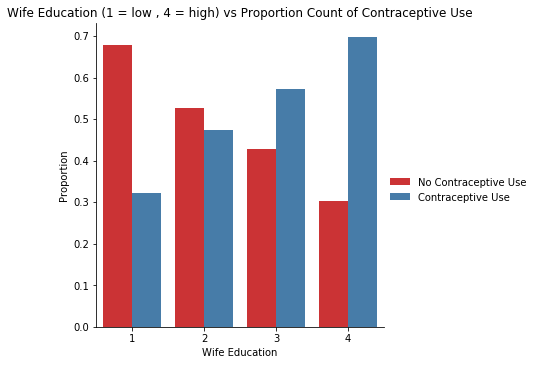

In [11]:
#Proportion Count Plot (Binary Data)
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

non_con_sum = np.array([(data[(data['wife_education'] == i) & (data['contraceptive'] == 1) ].shape[0]) for i in range(1,5)])
con_sum = np.array([(data[data['wife_education'] == i].shape[0] - non_con_sum[i-1])  for i in range(1,5)])
d = {'Wife Education' : [1, 2, 3, 4],
     'No Contraceptive Use': non_con_sum / wife_sum,
     'Contraceptive Use': con_sum / wife_sum}

edu_con_b = pd.DataFrame(data = d)
edu_con_b_melt = edu_con_b.melt(id_vars = ('Wife Education'), 
                                      value_vars = ('No Contraceptive Use', 'Contraceptive Use'), value_name = 'Proportion',
                               var_name = ' ')
sns.catplot(data = edu_con_b_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = ' ')
plt.title('Wife Education (1 = low , 4 = high) vs Proportion Count of Contraceptive Use')
plt.savefig('figs/edu_con_bi.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Religion

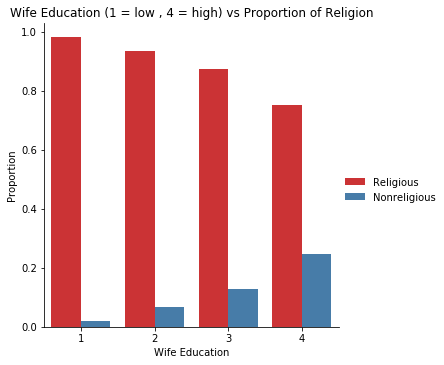

In [12]:
#Proportion Plot
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

religous_sum = np.array([np.sum(data[data['wife_education'] == i]['wife_religion']) for i in range(1,5)])
non_religous_sum = np.array([(data[data['wife_education'] == i].shape[0] - religous_sum[i-1])  for i in range(1,5)])

d = {'Wife Education' : [1, 2, 3, 4],
     'Religious': religous_sum / wife_sum,
     'Nonreligious': non_religous_sum / wife_sum}

edu_religion = pd.DataFrame(data = d)
edu_religion_melt = edu_religion.melt(id_vars = ('Wife Education'), 
                                      value_vars = ('Religious', 'Nonreligious'), value_name = 'Proportion', var_name = ' ')
sns.catplot(data = edu_religion_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = ' ')
plt.title('Wife Education (1 = low , 4 = high) vs Proportion of Religion')
plt.savefig('figs/edu_rel.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Work

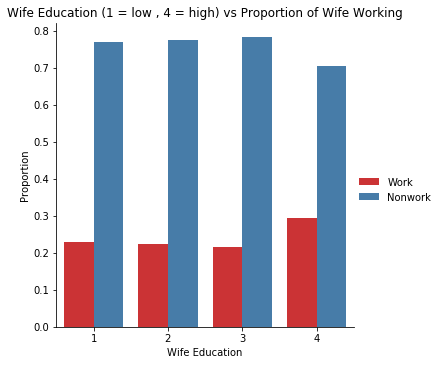

In [13]:
#Proportion Plot
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

non_work_sum = np.array([np.sum(data[data['wife_education'] == i]['wife_work']) for i in range(1,5)])
work_sum = np.array([(data[data['wife_education'] == i].shape[0] - non_work_sum[i-1])  for i in range(1,5)])

d = {'Wife Education' : [1, 2, 3, 4],
     'Work': work_sum / wife_sum,
     'Nonwork': non_work_sum / wife_sum}

edu_work = pd.DataFrame(data = d)
edu_work_melt = edu_work.melt(id_vars = ('Wife Education'), 
                                      value_vars = ('Work', 'Nonwork'), value_name = 'Proportion', var_name = ' ')
sns.catplot(data = edu_work_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = ' ')
plt.title('Wife Education (1 = low , 4 = high) vs Proportion of Wife Working')
plt.savefig('figs/edu_work.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Media

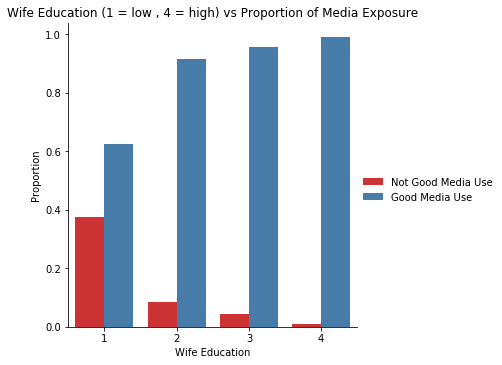

In [14]:
#Proportion Plot
wife_sum = [data[data['wife_education'] == i].shape[0] for i in range(1,5)]
wife_sum = np.array(wife_sum)

bad_media_sum = np.array([np.sum(data[data['wife_education'] == i]['media_exposure']) for i in range(1,5)])
good_media_sum = np.array([(data[data['wife_education'] == i].shape[0] - bad_media_sum[i-1])  for i in range(1,5)])

d = {'Wife Education' : [1, 2, 3, 4],
     'Not Good Media Use': bad_media_sum / wife_sum,
     'Good Media Use': good_media_sum / wife_sum}

edu_media = pd.DataFrame(data = d)
edu_media_melt = edu_media.melt(id_vars = ('Wife Education'), 
                                      value_vars = ('Not Good Media Use', 'Good Media Use'), value_name = 'Proportion', var_name = ' ')
sns.catplot(data = edu_media_melt, x = 'Wife Education', y  = 'Proportion',
            kind = 'bar', hue = ' ')
plt.title('Wife Education (1 = low , 4 = high) vs Proportion of Media Exposure')
plt.savefig('figs/edu_media.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. num_child/wife_age

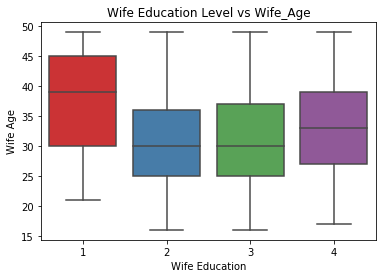

In [15]:
#Boxplot
sns.boxplot(x = 'wife_education', y = 'wife_age', data = data)
plt.xlabel("Wife Education")
plt.ylabel('Wife Age')
plt.title("Wife Education Level vs Wife_Age")
plt.savefig('figs/edu_age.png', quality = 100, dpi = 400, bbox_inches="tight")

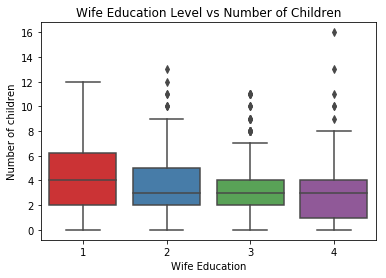

In [16]:
#Boxplot
sns.boxplot(x = 'wife_education', y = 'num_child', data = data)
plt.xlabel("Wife Education")
plt.ylabel('Number of children')
plt.title("Wife Education Level vs Number of Children")
plt.savefig('figs/edu_num_child.png', quality = 100, dpi = 400, bbox_inches="tight")

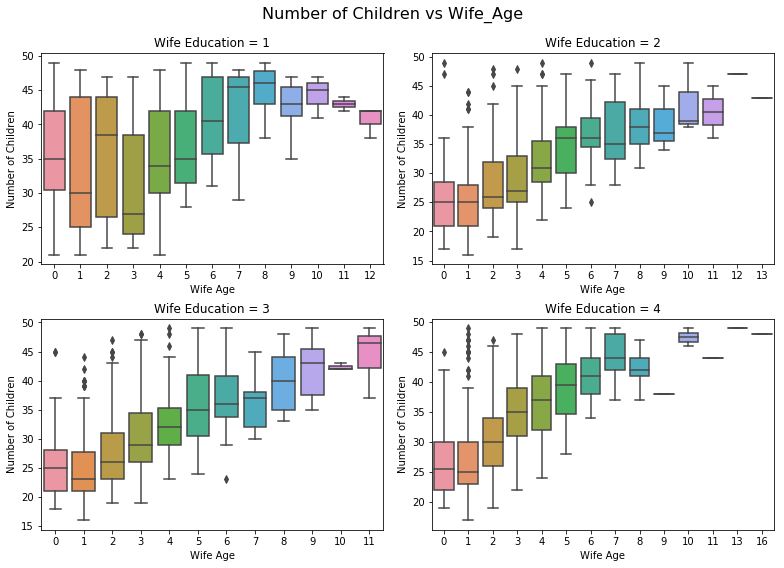

In [17]:
#Colorful graph 
fig, ax = plt.subplots(2, 2)

sns.boxplot(x = 'num_child', y = 'wife_age', data = data.query("wife_education == 1"), ax = ax[0, 0])
sns.boxplot(x = 'num_child', y = 'wife_age', data = data.query("wife_education == 2"), ax = ax[0, 1])
sns.boxplot(x = 'num_child', y = 'wife_age', data = data.query("wife_education == 3"), ax = ax[1, 0])
sns.boxplot(x = 'num_child', y = 'wife_age', data = data.query("wife_education == 4"), ax = ax[1, 1])

ax[0, 0].set_title("Wife Education = 1")
ax[0, 0].set_ylabel("Number of Children")
ax[0, 0].set_xlabel("Wife Age")

ax[0, 1].set_title("Wife Education = 2")
ax[0, 1].set_ylabel("Number of Children")
ax[0, 1].set_xlabel("Wife Age")

ax[1, 0].set_title("Wife Education = 3")
ax[1, 0].set_ylabel("Number of Children")
ax[1, 0].set_xlabel("Wife Age")

ax[1, 1].set_title("Wife Education = 4")
ax[1, 1].set_ylabel("Number of Children")
ax[1, 1].set_xlabel("Wife Age")

fig.suptitle('Number of Children vs Wife_Age', fontsize=16)
fig.set_size_inches(11,8)
fig.tight_layout()

fig.subplots_adjust(top=0.9)
plt.savefig('figs/age_num_child.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Wife Education vs. Standard Living

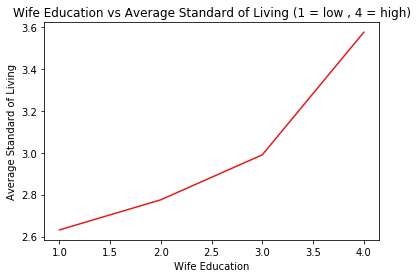

In [18]:
#Line Plot
avg_stliving = data[['wife_education', 'standard_living']].groupby(['wife_education']).mean()
plt.plot(avg_stliving.index, avg_stliving['standard_living'])
plt.xlabel("Wife Education")
plt.ylabel('Average Standard of Living')
plt.title('Wife Education vs Average Standard of Living (1 = low , 4 = high)')
plt.savefig('figs/edu_sol.png', quality = 100, dpi = 400, bbox_inches="tight")

# Preprocessing  Data cleaning/Transformations

In [19]:
#imports
from sklearn.preprocessing import MinMaxScaler
data_model = data.copy()

##### Make contraceptive binary

In [20]:
#method to make the current trinary data binary
def bin_con(x):
    if x != 1:
        return 1
    else:
        return 0
    
#make contraceptive data binary
data_model['contraceptive'] = data_model['contraceptive'].apply(bin_con)

##### Drop husband_occupation column

In [21]:
data_model.drop(columns = ['husband_occupation'], axis = 1, inplace = True)

##### One-Hot encode categorical data

In [22]:
#One-Hot encode categorical data
def ohe(data, columns):
    """
  input:
    data: pandas data frame 
    columns: column labels for columns that need to be one hot encoded
  
  output: pandas dataframe with columns (specified as an argument) one hot 
  encoded
  """
    data = data.copy()
    for i in columns:
        data[i] = data[i].astype(str)
        vec_enc = DictVectorizer()
        vec_enc.fit(data[[i]].to_dict(orient='records'))
        feature_data = vec_enc.transform(data[[i]].to_dict(orient='records')).toarray()
        feature_cats = vec_enc.get_feature_names()
        feature_qu = pd.DataFrame(feature_data, columns=feature_cats)
        data = pd.concat([data, feature_qu], axis=1)
        data = data.drop([i], axis = 1)    
    return data

#don't include numerical data
columns = ['standard_living', 'husband_education', 'media_exposure', 'wife_religion', 'contraceptive', 'wife_work']
data_model = ohe(data_model, columns)

##### Standardize Numerical data

In [23]:
#standardize wife_age
scale = MinMaxScaler()
data_model['wife_age'] = scale.fit_transform(data_model['wife_age'].values.reshape(-1, 1))

#standradize num_child
data_model['num_child'] = scale.fit_transform(data_model['num_child'].values.reshape(-1, 1))
data_standardized = data_model.copy()


In [24]:
#check data is what is it suppose to look like
data_model.head()

,wife_age,wife_education,num_child,standard_living=1,standard_living=2,standard_living=3,standard_living=4,husband_education=1,husband_education=2,husband_education=3,husband_education=4,media_exposure=0,media_exposure=1,wife_religion=0,wife_religion=1,contraceptive=0,contraceptive=1,wife_work=0,wife_work=1
0,0.242424,2,0.1875,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.878788,1,0.6250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.818182,2,0.4375,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.787879,3,0.5625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.606061,3,0.5000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Creating Model

In [25]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

##### Split Data

In [26]:
#create train and test
x_train_final, x_test,y_train_final,y_test = train_test_split(data_model.drop(columns = ['wife_education'], axis = 1),data_model['wife_education'], test_size=0.25, random_state=42)

#create val from train
x_train, x_val, y_train, y_val = train_test_split(x_train_final, y_train_final, test_size=0.25, random_state = 1)

##### Create Initial models (without any tuning)

In [27]:
#Logistic Regression
log_model = LogisticRegressionCV(cv = 5, multi_class = 'ovr', max_iter= 10000, solver='lbfgs')
log_model.fit(x_train, y_train)

log_train_accuracy = log_model.score(x_train, y_train)
log_val_accuracy = log_model.score(x_val, y_val)

print("Logistic Regression")

log_train_accuracy, log_val_accuracy

Logistic Regression


(0.5845410628019324, 0.5905797101449275)

In [28]:
#Descision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_train_accuracy = dt_model.score(x_train, y_train)
dt_val_accuracy = dt_model.score(x_val, y_val)

print("Decision Tree")

dt_train_accuracy, dt_val_accuracy

Decision Tree


(0.9565217391304348, 0.48188405797101447)

In [29]:
#Random Forest
rfmodel = RandomForestClassifier(n_estimators = 100)
rfmodel.fit(x_train, y_train)

rf_train_accuracy = rfmodel.score(x_train, y_train)
rf_val_accuracy = rfmodel.score(x_val, y_val)

print("Random Forest")

rf_train_accuracy, rf_val_accuracy

Random Forest


(0.9565217391304348, 0.532608695652174)

### Hyper Parameters

In [30]:
#helper functions
def calcAverage(rfmodel):
    train = []
    test = []
    for x in range(100):
        rfmodel.fit(x_train, y_train)
        predictions = rfmodel.predict(x_test) 
        
        rf_train_accuracy = rfmodel.score(x_train, y_train)
        rf_test_accuracy = rfmodel.score(x_test, y_test)
        
        train.append(rf_train_accuracy)
        test.append(rf_test_accuracy)
        
    return np.average(train), np.average(test)

def findIndexHyperParam(train_acc, val_acc):
    min_diff = np.abs(np.array(train_acc) - np.array(val_acc))
    min_diff_index = [i for i in range(len(min_diff)) if min_diff[i] < 0.01]
    
    curr_val_acc = val_acc[min_diff_index[0]]
    curr_index = min_diff_index[0]
    
    for j in min_diff_index:
        if val_acc[j] > curr_val_acc:
            cur_val_acc = val_acc[j]
            curr_index = j
            
    return curr_index  

#### Logistic Regression Hyperparameter Exploration 

Best C value:  [1.011119191919192]


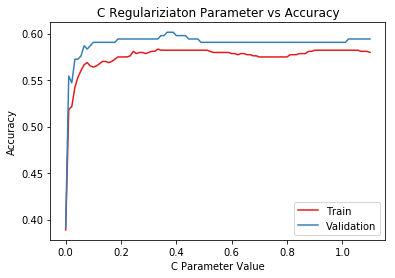

In [70]:
#explore regularization strength
X = np.linspace(0.0001, 1.1, num=100)
C = [[i] for i in X]
train_results = []
val_results = []
for c in C:
    clf = LogisticRegressionCV(multi_class = 'ovr', Cs = c, cv = 5, max_iter = 1000, solver='lbfgs')
    clf.fit(x_train, y_train)
    train_results.append(clf.score(x_train, y_train))
    val_results.append(clf.score(x_val, y_val))

#best_c = C[findIndexHyperParam(train_results, val_results)]
print('Best C value: ', best_c)

line1= plt.plot(X, train_results, label ="Train")
line2= plt.plot(X, val_results, label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("C Parameter Value")
plt.title('C Regulariziaton Parameter vs Accuracy')
plt.legend()
plt.savefig('figs/hyper_log_CS.png', quality = 100, dpi = 400, bbox_inches="tight")

Best CV value:  19


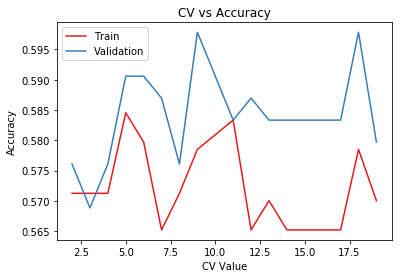

In [68]:
#explore number of folds used during cross-validation
CV = range(2,20)
train_results = []
val_results = []
for c in CV:
    clf = LogisticRegressionCV(multi_class = 'ovr', cv = c, max_iter = 1000, solver='lbfgs')
    clf.fit(x_train, y_train)
    train_results.append(clf.score(x_train, y_train))
    val_results.append(clf.score(x_val, y_val))

#best_cv = CV[findIndexHyperParam(train_results, val_results)]
print('Best CV value: ', best_cv)

line1= plt.plot(CV, train_results, label ="Train")
line2= plt.plot(CV, val_results, label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("CV Value")
plt.title('CV vs Accuracy')
plt.legend()
plt.savefig('figs/hyper_log_CV.png', quality = 100, dpi = 400, bbox_inches="tight")

#####  Random Forest Hyperparameter Exploration

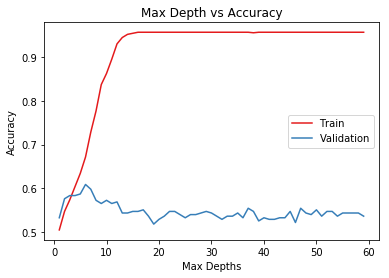

In [67]:
#explore max_depths
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
    
max_depths = range(1, 60)
train_results = []
val_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(x_train, y_train)

    train_results.append(rf.score(x_train, y_train))
    val_results.append(rf.score(x_val, y_val))

#best_depth = max_depths[findIndexHyperParam(train_results, val_results)]
#print('Best max_depth: ', best_depth)

line1= plt.plot(max_depths, train_results, label ="Train");
line2= plt.plot(max_depths, val_results, label = "Validation");
plt.ylabel("Accuracy")
plt.xlabel("Max Depths")
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.savefig('figs/hyper_rf_maxdepth.png', quality = 100, dpi = 400, bbox_inches="tight")

Best n_estimator  120


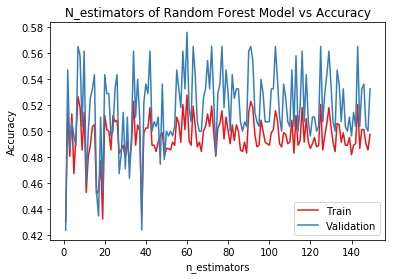

In [64]:
#explore n_estimators 
n_estimators = range(1, 150)
train_results = []
val_results = []
saved_acc = 0
saved_n = 0
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators = int(n), max_depth = best_depth)
    rf.fit(x_train, y_train)
    
    train_results.append(rf.score(x_train, y_train))
    val_results.append(rf.score(x_val, y_val))

best_n = n_estimators[findIndexHyperParam(train_results, val_results)]
print('Best n_estimator ', best_n)

    
line1= plt.plot(n_estimators, train_results, label ="Train")
line2= plt.plot(n_estimators, val_results, label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.title('N_estimators of Random Forest Model vs Accuracy')
plt.legend()
plt.savefig('figs/hyper_rf_nest.png', quality = 100, dpi = 400, bbox_inches="tight")

Best n_estimator  1


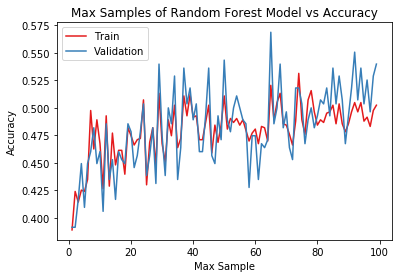

In [63]:
#explore max_samples
max_s = range(1, 100)
train_results = []
val_results = []

for max_sample in max_s:
    rf = RandomForestClassifier(max_samples=int(max_sample), n_estimators = 100, max_depth = best_depth)
    rf.fit(x_train, y_train)

    train_results.append(rf.score(x_train, y_train))
    val_results.append(rf.score(x_val, y_val))
    
best_sample = max_s[findIndexHyperParam(train_results, val_results)]
print('Best n_estimator ', best_n)
        
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(max_s, train_results, label ="Train")
line2= plt.plot(max_s, val_results, label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Max Sample")
plt.title('Max Samples of Random Forest Model vs Accuracy')
plt.legend()
plt.savefig('figs/hyper_rf_maxsamp.png', quality = 100, dpi = 400, bbox_inches="tight")

In [42]:
#Comparing average accuracy of 4 different random forest models based on findings above:
rfmodel1 = RandomForestClassifier(n_estimators = 100, max_depth = best_depth, oob_score = True, max_samples = 40) 
rfmodel2 = RandomForestClassifier(n_estimators = 100, max_depth = 40, oob_score = True, max_samples = 40)
rfmodel3 = RandomForestClassifier(n_estimators = 100, max_depth = best_depth, max_samples = 40)
rfmodel4 = RandomForestClassifier(n_estimators = 99, max_depth=3)

rf_1 = calcAverage(rfmodel1)
rf_2 = calcAverage(rfmodel2)
rf_3 = calcAverage(rfmodel3)
rf_4 = calcAverage(rfmodel4)

print("rfmodel1:  ", "train accuracy: ", rf_1[0], " val accuracy: ", rf_1[1])
print("rfmodel2:  ", "train accuracy: ", rf_2[0], " val accuracy: ", rf_2[1])
print("rfmodel3:  ", "train accuracy: ", rf_3[0], " val accuracy: ", rf_3[1])
print("rfmodel4:  ", "train accuracy: ", rf_4[0], " val accuracy: ", rf_4[1])

rfmodel1:   train accuracy:  0.5771135265700483  val accuracy:  0.5563685636856369
rfmodel2:   train accuracy:  0.6083454106280194  val accuracy:  0.5471815718157182
rfmodel3:   train accuracy:  0.5771256038647343  val accuracy:  0.5536314363143632
rfmodel4:   train accuracy:  0.5735628019323671  val accuracy:  0.5585365853658537


##### Feature Selection

Selected Features:  ['wife_age', 'num_child', 'husband_education=1', 'husband_education=2', 'husband_education=4', 'media_exposure=0', 'media_exposure=1']


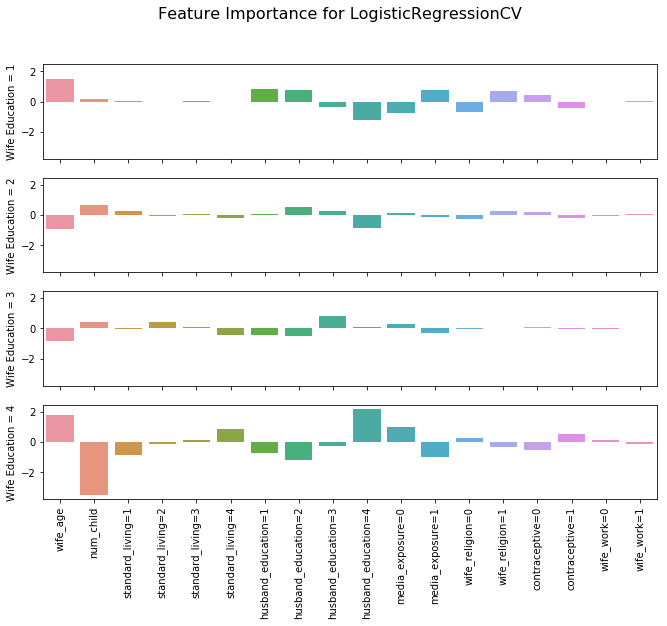

In [43]:
#Logistic Regression
sel_features_log = SelectFromModel(estimator = LogisticRegressionCV(cv = 5, multi_class = 'ovr', max_iter= 10000, solver = 'lbfgs'))
sel_features_log.fit(x_train, y_train)
selected_features_log = x_train.columns[(sel_features_log.get_support())]

print('Selected Features: ', list(selected_features_log))
coefs = sel_features_log.estimator_.coef_

x_ax = x_train.columns
fig, axs = plt.subplots(4,1, sharex = True, sharey=True)

sns.barplot(x = x_ax, y = coefs[0], ax =  axs[0])
sns.barplot(x = x_ax, y = coefs[1], ax =  axs[1])
sns.barplot(x = x_ax, y = coefs[2], ax =  axs[2])
sns.barplot(x = x_ax, y = coefs[3], ax =  axs[3])

axs[0].set_ylabel('Wife Education = 1')
axs[1].set_ylabel('Wife Education = 2')
axs[2].set_ylabel('Wife Education = 3')
axs[3].set_ylabel('Wife Education = 4')

plt.xticks(rotation='vertical')
fig.suptitle('Feature Importance for LogisticRegressionCV', fontsize=16)
fig.set_size_inches(11,8)
plt.savefig('figs/feature_selection_log', quality = 100, dpi = 400, bbox_inches="tight")

In [44]:
# added two features to the model that we see have positive affects on classifiction
selected_features_log = list(selected_features_log)
selected_features_log.append('husband_education=3')
selected_features_log.append('standard_living=2')

Selected Features:  ['wife_age', 'standard_living=4', 'husband_education=2', 'husband_education=3', 'husband_education=4']


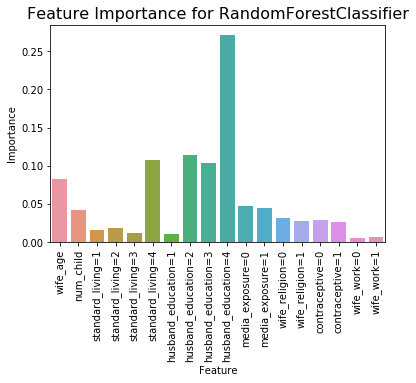

In [45]:
#Random Forest
sel_features_rf = SelectFromModel(RandomForestClassifier(n_estimators = 100, max_depth = 4))
sel_features_rf.fit(x_train, y_train)
selected_features_rf= x_train.columns[(sel_features_rf.get_support())]

print('Selected Features: ', list(selected_features_rf))

coefs = sel_features_rf.estimator_.feature_importances_

x_ax = x_train.columns
sns.barplot(x = x_ax, y = coefs)

plt.xticks(rotation='vertical')
plt.title('Feature Importance for RandomForestClassifier', fontsize=16)
plt.xlabel('Feature')
plt.ylabel('Importance')
fig.set_size_inches(11,8)

plt.savefig('figs/feature_selection_rf.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Reassess Models

In [46]:
#use only selected features for each model
x_train_log, x_val_log = x_train[selected_features_log], x_val[selected_features_log]
x_train_rf, x_val_rf = x_train[selected_features_rf], x_val[selected_features_rf]

New Best max_depth:  1


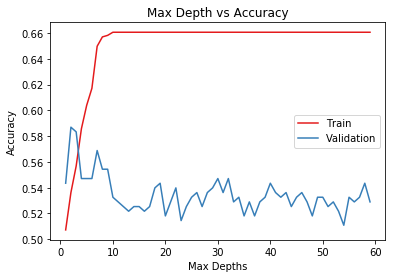

In [69]:
#reassess max_depth
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
    
max_depths = range(1, 60)
train_results = []
val_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators = 100)
    rf.fit(x_train_rf, y_train)

    train_results.append(rf.score(x_train_rf, y_train))
    val_results.append(rf.score(x_val_rf, y_val))

#best_depth = max_depths[findIndexHyperParam(train_results, val_results)]
print('New Best max_depth: ', best_depth)

line1= plt.plot(max_depths, train_results, label ="Train");
line2= plt.plot(max_depths, val_results, label = "Validation");
plt.ylabel("Accuracy")
plt.xlabel("Max Depths")
plt.title('Max Depth vs Accuracy')
plt.legend()

plt.savefig('figs/hyper_reasses_rf_maxdepth.png', quality = 100, dpi = 400, bbox_inches="tight")

##### Compare Final Models

In [55]:
#imports
from sklearn.metrics import  precision_recall_fscore_support

In [56]:
#create proposed final models
final_log = LogisticRegressionCV(multi_class = 'ovr', cv = 5, max_iter = 1000, solver='lbfgs')
final_rf = RandomForestClassifier(n_estimators = 100, max_depth = 3)

x_train_log, x_val_log = x_train[selected_features_log], x_val[selected_features_log]
x_train_rf, x_val_rf = x_train[selected_features_rf], x_val[selected_features_rf]

final_log.fit(x_train_log, y_train)
final_rf.fit(x_train_rf, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy For LogisticRegressionCV:  0.5519323671497585
Validation Accuracy For LogisticRegressionCV:  0.5688405797101449
Training Accuracy For RandomForestClassifier:  0.5543478260869565
Validation Accuracy For RandomForestClassifier:  0.5978260869565217


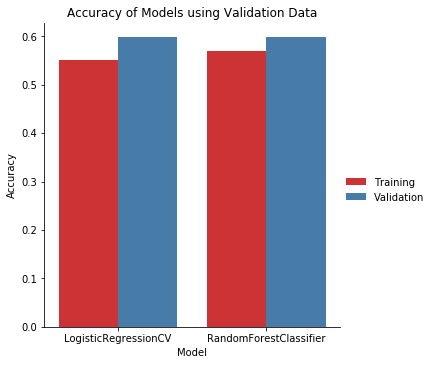

In [57]:
#compare training and validation accuracy between models

train_accuracy_log = final_log.score(x_train_log, y_train)
train_accuracy_rf = final_rf.score(x_train_rf, y_train)

val_accuracy_log = final_log.score(x_val_log, y_val)
val_accuracy_rf = final_rf.score(x_val_rf, y_val)

d = {'Model' : ['LogisticRegressionCV', 'RandomForestClassifier' ],
     'Training': [train_accuracy_log ,val_accuracy_log],
     'Validation': [val_accuracy_rf, val_accuracy_rf]}

acc_df = pd.DataFrame(data = d)

acc_melt = acc_df.melt(id_vars = ('Model'), 
                                      value_vars = ('Training', 'Validation'), value_name = 'Accuracy', var_name = ' ')
sns.catplot(data = acc_melt, x = 'Model', y  = 'Accuracy',
            kind = 'bar', hue = ' ')
plt.title('Accuracy of Models using Validation Data')

print('Training Accuracy For LogisticRegressionCV: ', train_accuracy_log )
print('Validation Accuracy For LogisticRegressionCV: ', val_accuracy_log )

print('Training Accuracy For RandomForestClassifier: ', train_accuracy_rf )
print('Validation Accuracy For RandomForestClassifier: ', val_accuracy_rf )

plt.savefig('figs/compare_acc.png', quality = 100, dpi = 400, bbox_inches="tight")

Validation Precision For LogisticRegressionCV:  [0.52380952 0.5625     0.46341463 0.63057325]
Validation Precision For RandomForestClassifier:  [1.         0.60526316 0.52173913 0.61585366]
Validation Recall For LogisticRegressionCV:  [0.37931034 0.18       0.42696629 0.91666667]
Validation Recall For RandomForestClassifier:  [0.17241379 0.46       0.40449438 0.93518519]


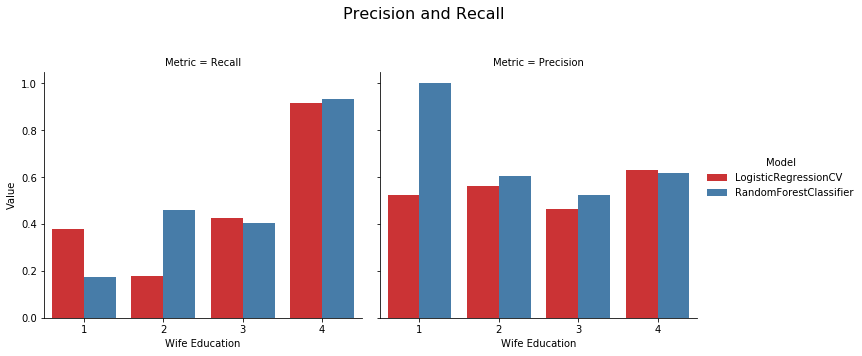

In [58]:
#compare at precision and recall on validation data for each education level
predictions_log = final_log.predict(x_val_log)
predictions_rf = final_rf.predict(x_val_rf)

prfs_log = precision_recall_fscore_support(y_val, predictions_log, average=None,labels=[1,2,3,4])
precision_log = prfs_log[0]
recall_log = prfs_log[1]

prfs_rf = precision_recall_fscore_support(y_val, predictions_rf, average=None,labels=[1,2,3,4])
precision_rf = prfs_rf[0]
recall_rf = prfs_rf[1]

d_precision = {'Wife Education' : [1, 2, 3, 4],
     'LogisticRegressionCV': precision_log,
     'RandomForestClassifier':precision_rf,
    }

d_recall = {'Wife Education' : [1, 2, 3, 4],
     'LogisticRegressionCV': recall_log,
     'RandomForestClassifier': recall_rf,
    }

precision_df = pd.DataFrame(data = d_precision)
precision_melt = precision_df.melt(id_vars = ('Wife Education'), 
                                     value_vars = ('LogisticRegressionCV', 'RandomForestClassifier'), value_name = 'Value', var_name = 'Model')

recall_df = pd.DataFrame(data = d_recall)
recall_melt = recall_df.melt(id_vars = ('Wife Education'), 
                                      value_vars = ('LogisticRegressionCV', 'RandomForestClassifier'), value_name = 'Value',  var_name = 'Model')

recall_melt["Metric"] = ['Recall', 'Recall', 'Recall', 'Recall','Recall', 'Recall', 'Recall', 'Recall']
precision_melt["Metric"] = ['Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision']

metric_melt = recall_melt.append(precision_melt)

g = sns.catplot(data = metric_melt, x = 'Wife Education', y  = 'Value',
            kind = 'bar', hue = 'Model', col = 'Metric')

g.fig.suptitle('Precision and Recall', fontsize=16)
g.fig.subplots_adjust(top=0.8)

print('Validation Precision For LogisticRegressionCV: ',precision_log)
print('Validation Precision For RandomForestClassifier: ',precision_rf)
print('Validation Recall For LogisticRegressionCV: ',recall_log)
print('Validation Recall For RandomForestClassifier: ',recall_rf)

plt.savefig('figs/compare_pr.png', quality = 100, dpi = 400, bbox_inches="tight")

# Final Model

In [59]:
#Training, vs validation, vs test line plot
final_model = final_log
x_test_final = x_test[selected_features_log]

Training Accuracy:  0.5519323671497585
Test Accuracy:  0.5688405797101449
Validation Accuracy:  0.5528455284552846


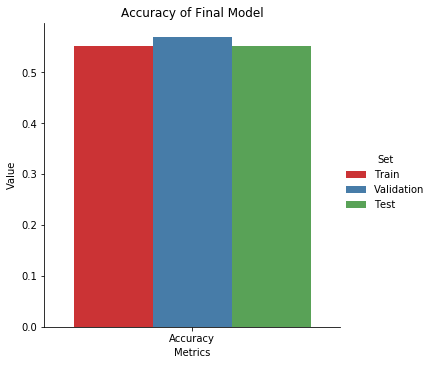

In [71]:
final_train_accuracy = final_model.score(x_train_log,  y_train)
final_val_accuracy  = val_accuracy_log
final_test_accuracy = final_model.score(x_test_final, y_test)

print('Training Accuracy: ', final_train_accuracy)
print('Test Accuracy: ', final_val_accuracy)
print('Validation Accuracy: ', final_test_accuracy)

d = {'Metrics' : ['Accuracy'],
     'Train': [final_train_accuracy],
     'Validation': [final_val_accuracy],
     'Test' : [final_test_accuracy ]}

final_df = pd.DataFrame(data = d)
final_melt = final_df.melt(id_vars = ('Metrics'), 
                                      value_vars = ('Train', 'Validation', 'Test'), value_name = 'Value', var_name = 'Set')
sns.catplot(data = final_melt, x = 'Metrics', y  = 'Value',
            kind = 'bar', hue = 'Set')
plt.title('Accuracy of Final Model')
plt.savefig('figs/final_acc.png', quality = 100, dpi = 400, bbox_inches="tight")

# Conclusion/Future Work

In [ ]:
#newdata set stuff ?